# Proyecto 1 - Etapa 1

## Trabajo en equipo (8%)



## Contexto: Descripción general Fondo de Poblaciones de las Naciones Unidas
El Fondo de Poblaciones de las Naciones Unidas (UNFPA) junto con entidades públicas y haciendo uso de diferentes herramientas de participación ciudadana, busca identificar problemas y evaluar soluciones actuales, relacionando la información dada por los ciudadanos con los diferentes Objetivos de Desarrollo Sostenible (ODS). Los ODS fueron adoptados por las Naciones Unidas en 2015 como un llamamiento universal para poner fin a la pobreza, proteger el planeta y garantizar que para el 2030 todas las personas disfruten de paz y prosperidad. 


En este contexto, uno de los procesos que requiere mayor esfuerzo es el análisis de la información textual recopilada, ya que consume muchos recursos, que incluyen la participación de un experto. Es así como el UNFPA quiere desarrollar un proyecto con ustedes, donde el objetivo principal es relacionar de forma automática opiniones de los ciudadanos con los ODS 3, 4 y 5. A nivel de la solución a plantear deben aplicar la metodología de desarrollo de aplicaciones analíticas para crear un modelo analítico que sea utilizado y reentrenado por medio de una aplicación web o móvil a partir de un conjunto de opiniones que contienen texto en lenguaje natural. lenguaje natural

# 0. Preparación del entorno de trabajo

In [4]:
import sys
# Actualización de pip
!{sys.executable} -m pip install --upgrade pip

# Desinstalar versiones incompatibles de joblib y visions
!pip uninstall joblib visions -y

# Manejo de contracciones en inglés
!pip install -q contractions

# Librería para manejar las flexiones gramaticales en el idioma inglés
!pip install -q inflect

# Gráficas para scikit-learn
!pip install -q scikit-plot

# SpaCy para procesamiento de lenguaje natural
!pip install -q -U spacy
!python -m spacy download es_core_news_sm -q

# Pandas para manejo de datos
!pip install -q pandas

# Instalar versiones específicas de joblib y visions
!pip install joblib==1.1.0 visions[type_image_path]==0.7.4

# Instalar pandas-profiling versión compatible
!pip install pandas-profiling==3.2.0

# Instalar ydata-profiling versión compatible
!pip install ydata-profiling==4.9.0

# tqdm para mostrar barras de progreso
!pip install -q tqdm

# Instalar langdetect para la detección de idiomas
!pip install langdetect

import nltk
# Descargar modelos y datos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
import numpy as np
import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import sklearn as sklearn
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter

from tqdm import tqdm
from langdetect import detect, DetectorFactory


Found existing installation: joblib 1.1.0
Uninstalling joblib-1.1.0:
  Successfully uninstalled joblib-1.1.0
Found existing installation: visions 0.7.6
Uninstalling visions-0.7.6:
  Successfully uninstalled visions-0.7.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, which is not installed.
ydata-profiling 4.9.0 requires visions[type_image_path]<0.7.7,>=0.7.5, which is not installed.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
  Using cached joblib-1.1.0-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.12.3 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.0 which is incompatible.
ydata-profiling 4.9.0 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Santiago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Santiago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Santiago\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
def reemplazar_caracteres(texto):
    if not isinstance(texto, str):
        return texto
    
    # Reemplazar caracteres mal codificados
    texto = texto.replace('Ã¡', 'a')
    texto = texto.replace('Ã©', 'e')
    texto = texto.replace('Ã­', 'i')
    texto = texto.replace('Ã³', 'o')
    texto = texto.replace('Ãº', 'u')
    texto = texto.replace('Ã±', 'ñ')
    return texto

# Leer el archivo Excel
df_sin_corregir = pd.read_excel('data/ODScat_345.xlsx', engine='openpyxl')

# Aplicar la función de reemplazo a la columna de texto
df_sin_corregir['Textos_espanol'] = df_sin_corregir['Textos_espanol'].apply(reemplazar_caracteres)

# Guardar el DataFrame corregido como archivo CSV con codificación utf-8
df_sin_corregir.to_csv('data/archivo_corregido.csv', encoding='utf-8', index=False)

# Leer el archivo CSV para verificar
df = pd.read_csv('data/archivo_corregido.csv', encoding='utf-8')


# 1. Entendimiento de los datos

En esta etapa inicial, nos enfocamos en el perfilamiento y análisis de la calidad de los datos con el objetivo de obtener una comprensión profunda sobre su estructura, contenido y calidad. Esta fase es crucial para identificar posibles problemas y características que puedan influir en el tratamiento y preprocesamiento de los datos. 

## 1.1 Número de registros y columnas
En la siguiente celda se muestra el numero de registros y el numero de columnas del Dataframe.

In [9]:
df.shape

(4049, 2)

Se logra ver que existen 4049 registros y 2 columnas.

## 1.2 Tipo de Datos
En la siguiente celda se va a mirar la validez de los datos. Apartir del resultado, se puede mostrar que las columnas con las que vamos a trabajar (Textos_espanol y sdg) no tienen tipos de datos anamolos y son validos debido a las reglas de negocio.

In [12]:
df.dtypes

Textos_espanol    object
sdg                int64
dtype: object

## 1.3  Primeros Registros
En esta sección, se examina la estructura de los datos para obtener una visión preliminar de su contenido.

In [14]:
df.head()

,Textos_espanol,sdg
0,"Por ejemplo, el numero de consultas externas d...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3


Al revisar los primeros registros del conjunto de datos, se evidencian dos columnas:
* Textos_espanol: Contiene textos que representan opiniones en español sobre diversos temas.
* sdg: Representa la categoría del Objetivo de Desarrollo Sostenible (ODS) al que corresponde cada opinión, expresada como un valor entero.


El análisis de los primeros registros revela que la estructura de los datos es coherente con las expectativas del proyecto, con una columna dedicada a los textos y otra a la clasificación en categorías de ODS. Esta información inicial es fundamental para garantizar que los datos estén organizados de manera adecuada para el procesamiento posterior.

## 1.4 Descripción de los datos
En esta sección, se proporciona una visión general sobre la distribución de las categorías de los Objetivos de Desarrollo Sostenible (ODS) en el conjunto de datos.

In [17]:
df.describe()

,sdg
count,4049.000000
mean,4.051124
std,0.814338
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Estos resultados indican una distribución relativamente equilibrada entre las categorías de ODS 3, 4 y 5, con una ligera inclinación hacia los ODS 4 y 5. Esta información es útil para comprender la representatividad de cada categoría en el conjunto de datos y guiar el enfoque del análisis y modelado posterior.

## 1.5 Cantidad de nulos por columna
En esta sección, se evalúa la presencia de valores nulos en cada columna del conjunto de datos.

In [20]:
df.isnull().sum()

Textos_espanol    0
sdg               0
dtype: int64

La ausencia de valores nulos en ambas columnas indica que el conjunto de datos está completo y no presenta problemas de integridad en cuanto a datos faltantes. Esta métrica de calidad es crucial, ya que la presencia de valores nulos podría afectar la precisión y confiabilidad de los análisis posteriores y del modelo de machine learning. La completa disponibilidad de datos garantiza una base sólida para llevar a cabo un análisis exhaustivo y desarrollar modelos predictivos efectivos.

## 1.6 Cantidad de únicos por columna
En esta sección, se examina la métrica de calidad de unicidad para evaluar la presencia de registros únicos en cada columna del conjunto de datos

In [23]:
df.nunique()

Textos_espanol    4049
sdg                  3
dtype: int64

El análisis muestra que la columna Textos_espanol contiene 4049 valores únicos, lo que sugiere que cada entrada de texto es distinta y no hay registros duplicados en esta columna. Esto garantiza que no haya errores relacionados con opiniones repetidas, lo cual es crucial para la validez de los datos. Por otro lado, la columna sdg tiene 3 valores únicos, correspondientes a los tres ODS (3, 4 y 5) incluidos en el conjunto de datos.

## 1.7 Histograma de los Datos
En esta sección, se presenta un histograma que ilustra la distribución de frecuencias de la variable categórica sdg, que representa los Objetivos de Desarrollo Sostenible (ODS) con las clases 3, 4 y 5.

array([[<Axes: title={'center': 'sdg'}>]], dtype=object)

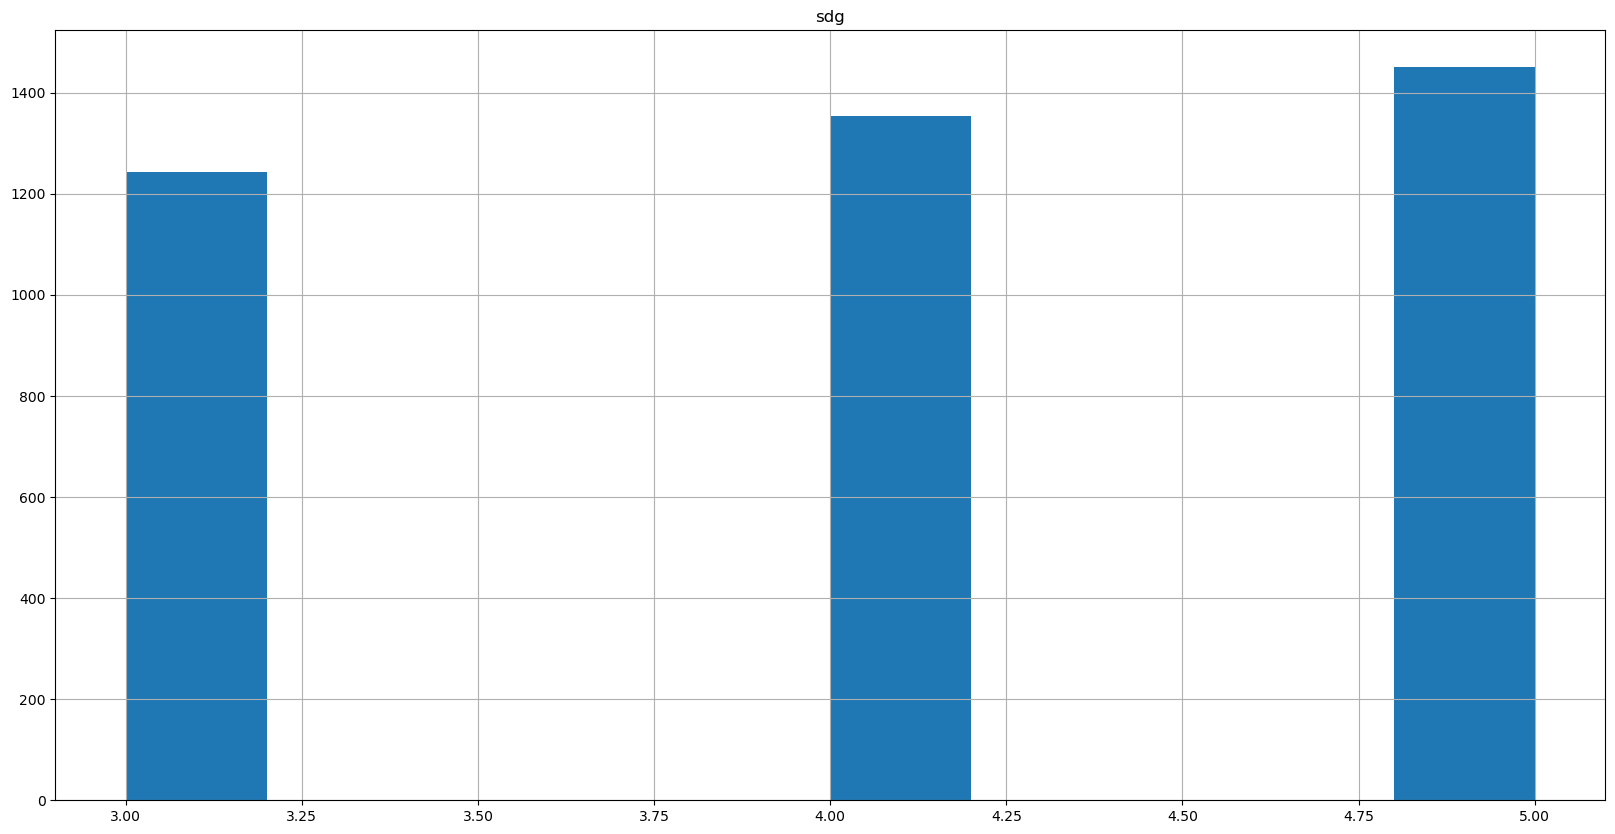

In [26]:
%matplotlib inline
df.hist(figsize=(20,10))

El histograma generado muestra las barras correspondientes a la cantidad de observaciones para cada clase de ODS. La distribución revela un incremento progresivo en la frecuencia de datos desde el ODS 3 hacia el ODS 5. Aunque se observa una mayor cantidad de datos en la clase ODS 5, la diferencia entre las clases no es lo suficientemente significativa como para inducir un sesgo importante hacia esta categoría en el modelo.

Esta distribución equilibrada de las clases es positiva para el análisis y el modelado, ya que sugiere que el modelo no estará excesivamente sesgado hacia ninguna de las categorías. Esto contribuye a una representación equitativa de los ODS en los datos, lo cual es crucial para el desarrollo de un modelo de clasificación robusto y fiable.

## 1.8 Análisis de la variable objetivo
En esta sección, se realiza un análisis detallado de la variable objetivo sdg, que clasifica los datos en las categorías correspondientes a los Objetivos de Desarrollo Sostenible (ODS) 3, 4 y 5. El conteo de las observaciones en cada clase se presenta a continuación:

In [29]:
df.value_counts(df['sdg'])

sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64

El análisis de la variable objetivo confirma que los datos están correctamente clasificados, sin valores anómalos o mal escritos. La métrica de consistencia se valida ya que todos los registros en la columna sdg cumplen con las reglas de negocio establecidas, y no se detectan inconsistencias en los datos.

Adicionalmente, el análisis del DataFrame muestra que:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


El DataFrame consta de 4049 entradas, con dos columnas: Textos_espanol (tipo object para textos) y sdg (tipo int64 para la categoría ODS). La ausencia de valores nulos y la correcta clasificación en la variable objetivo aseguran una base de datos sólida para el análisis y el desarrollo del modelo.

## 1.9 Análisis de la variable "Textos_espanol

### 1.9.1. Grafica que muestre la distribución de la longitud de los datos en la columna Review
Para analizar la longitud de los textos en la columna Textos_espanol, se ha generado un histograma que muestra la distribución de la cantidad de caracteres en los textos.

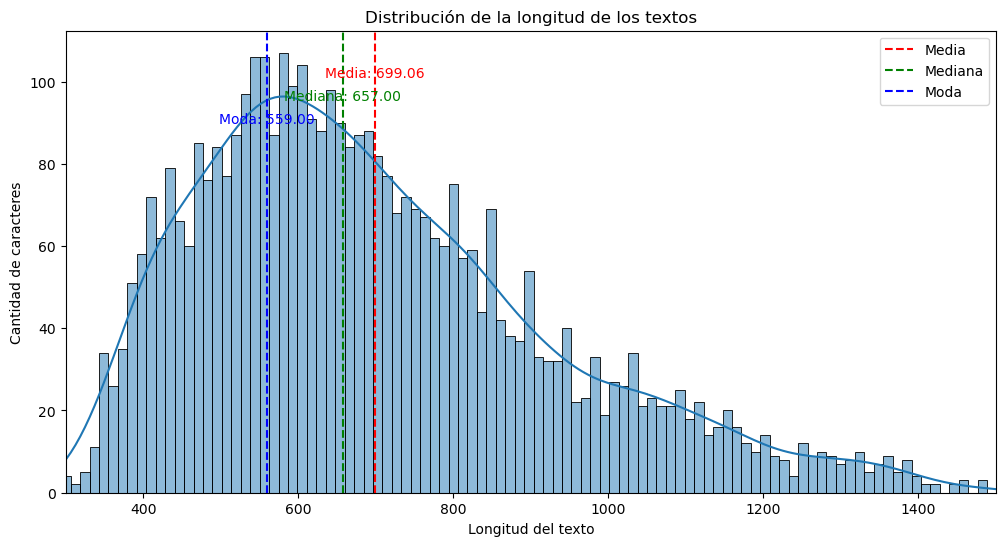

Valor mínimo de la longitud: 294
Valor máximo de la longitud: 1513


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar si la columna 'longitud' está en el DataFrame
if 'longitud' not in df.columns:
    # Si no existe, calcularla de nuevo
    df['longitud'] = df['Textos_espanol'].apply(len)

# Calcular la moda (puede haber más de una, por lo que se obtiene el primer valor)
moda = df['longitud'].mode()[0]

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.histplot(df['longitud'], bins=100, kde=True)
plt.xlim(300, 1500)

# Configurar etiquetas de los ejes y título del gráfico
plt.xlabel('Longitud del texto')
plt.ylabel('Cantidad de caracteres')
plt.title('Distribución de la longitud de los textos')

# Mostrar la tendencia central de los datos
plt.axvline(x=df['longitud'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(x=df['longitud'].median(), color='green', linestyle='--', label='Mediana')
plt.axvline(x=moda, color='blue', linestyle='--', label='Moda')

# Agregar anotaciones para media, mediana y moda
plt.text(df['longitud'].mean(), plt.ylim()[1]*0.9, f'Media: {df["longitud"].mean():.2f}', color='red', ha='center')
plt.text(df['longitud'].median(), plt.ylim()[1]*0.85, f'Mediana: {df["longitud"].median():.2f}', color='green', ha='center')
plt.text(moda, plt.ylim()[1]*0.8, f'Moda: {moda:.2f}', color='blue', ha='center')

plt.legend()

# Mostrar el gráfico
plt.show()

# Calcular el valor mínimo y máximo de la columna 'longitud'
min_longitud = df['longitud'].min()
max_longitud = df['longitud'].max()

# Imprimir los resultados
print(f'Valor mínimo de la longitud: {min_longitud}')
print(f'Valor máximo de la longitud: {max_longitud}')


# Eliminar la columna 'longitud' debido a que no nos sirve para la creación de los modelos
df.drop('longitud', axis=1, inplace=True)


A partir de la gráfica, se puede observar que la longitud de los textos en la columna Textos_espanol varía principalmente entre 294 y 1513 caracteres. La longitud media de los textos es aproximadamente 700 caracteres, mientras que la mediana es de alrededor de 657 caracteres. Estos valores indican que la mayoría de los textos se concentran en un rango intermedio, con una distribución relativamente simétrica.

### 1.9.2 Grafica que nos muestra cuales son las palabras mas comunes en la columna Textos_espanol teniendo en cuenta que no se tienen StopWords
En esta sección, se analiza la frecuencia de las palabras en la columna Textos_espanol para identificar las palabras más comunes, excluyendo las stopwords.

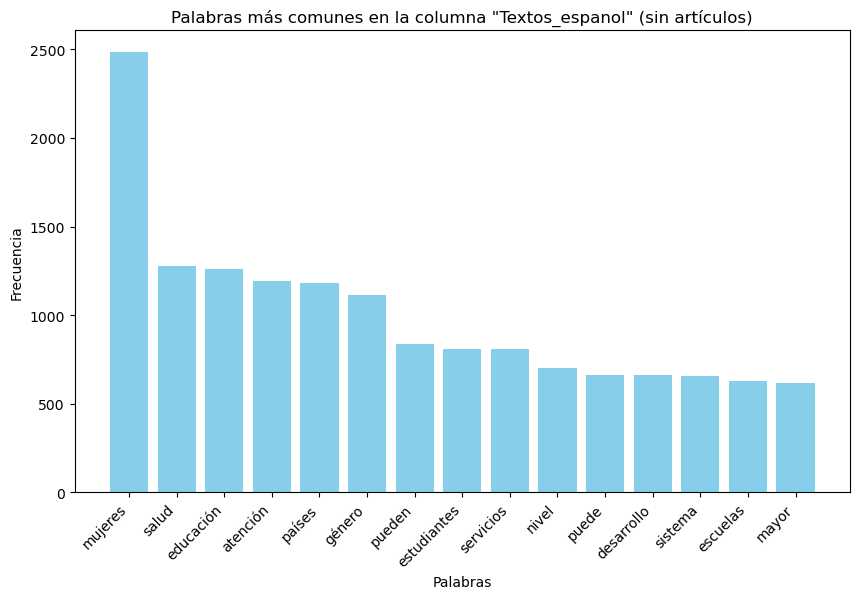

In [38]:
stop_words = set(stopwords.words('spanish'))

# Concatenar todos los textos en la columna 'Review'
all_text = ' '.join(df['Textos_espanol'])
words = all_text.split()

# Filtrar palabras que no sean stopwords
filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
word_freq = Counter(filtered_words)

# Seleccionar las palabras más comunes y mirar la frecuencia de los datos
num_words = 15
common_words = [(word, freq) for word, freq in word_freq.items() if word.isalpha()]
common_words = sorted(common_words, key=lambda x: x[1], reverse=True)[:num_words]
words, frequencies = zip(*common_words)

# Visualizar las palabras más comunes en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Palabras más comunes en la columna "Textos_espanol" (sin artículos)')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()



La gráfica muestra las palabras más frecuentes en la columna Textos_espanol, excluyendo stopwords. Esta información es valiosa para comprender mejor los temas recurrentes y aspectos destacados en las opiniones de los clientes. Analizar estas palabras puede revelar patrones de opinión, resaltar temas importantes y proporcionar información útil para la toma de decisiones estratégicas

## 1.9.3 Mostrar grafica de Bigramas y Trigramas de la columna Textos_espanol

### 1.9.3.1 Mostrar grafica de Bigramas mas comunes
Para identificar y visualizar los bigramas más comunes en la columna Textos_espanol, se ha realizado el siguiente análisis

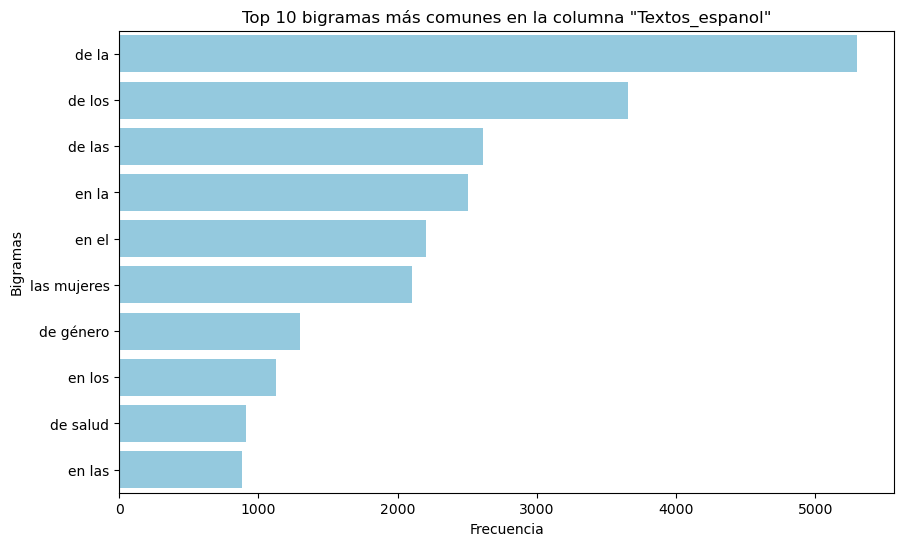

In [42]:
# Función para obtener los n n-gramas más comunes (bigrams o trigrams)
def get_top_n_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    ngrams_freq = [(ngram, sum_words[0, idx]) for ngram, idx in vec.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)
    return ngrams_freq[:n]

# Obtener los 10 bigramas más comunes
top_bigrams = get_top_n_ngrams(df['Textos_espanol'], 10, ngram_range=(2, 2))

# Convertir la lista de tuplas a dos listas separadas para el gráfico
bigrams = [ngram[0] for ngram in top_bigrams]
freqs = [freq[1] for freq in top_bigrams]

# Crear el gráfico de barras para bigramas
plt.figure(figsize=(10, 6))
sns.barplot(x=freqs, y=bigrams, color='skyblue')  # Cambiar palette a color
plt.title('Top 10 bigramas más comunes en la columna "Textos_espanol"')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.show()

La gráfica muestra los 10 bigramas más comunes en la columna Textos_espanol, representando las combinaciones de dos palabras que aparecen con mayor frecuencia en los textos. Estos bigramas proporcionan una visión adicional sobre los temas y patrones recurrentes en las opiniones de los clientes, permitiendo una comprensión más profunda de los aspectos más destacados y relevantes en los datos.

#### 1.9.3.2 Mostrar la grafica de los trigramas
Para obtener una visión más detallada de los patrones en los textos, se realiza el análisis de los trigramas en la columna Textos_espanol

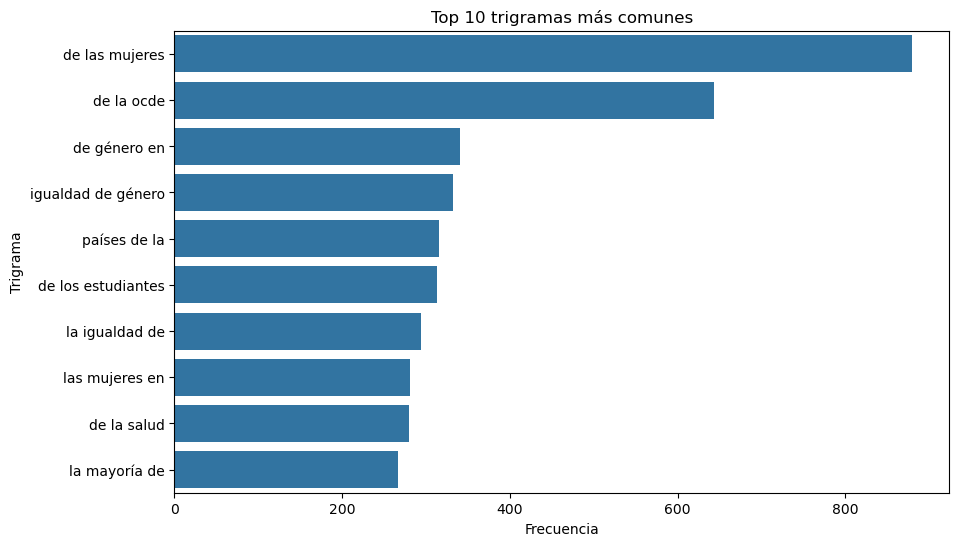

In [45]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)  # Cambiamos el rango a trigramas
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['Textos_espanol'], 10)

# Convertir la lista de tuplas a dos listas separadas para el gráfico
words = [word[0] for word in common_words]
freqs = [freq[1] for freq in common_words]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=freqs, y=words)
plt.title('Top 10 trigramas más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Trigrama')
plt.show()


El análisis de trigramas revela combinaciones de tres palabras consecutivas en los textos. Los trigramas más frecuentes incluyen "de las mujeres" (880 veces) y "de la ocde" (643 veces), indicando un enfoque predominante en temas relacionados con las mujeres y la OCDE. Otros trigramas como "igualdad de género" (332 veces) y "de los estudiantes" (313 veces) sugieren discusiones sobre igualdad y educación. Estos resultados muestran que los textos abordan principalmente temas de género, salud y educación, proporcionando una visión más detallada y específica sobre los temas recurrentes en los datos.

#### 1.9.3.3 Mostrar la grafica con las palabras mas largas de la columna Textos_espanol
Ahora se visualizarán las palabras más largas para tener un mejor entendimiento de los datos

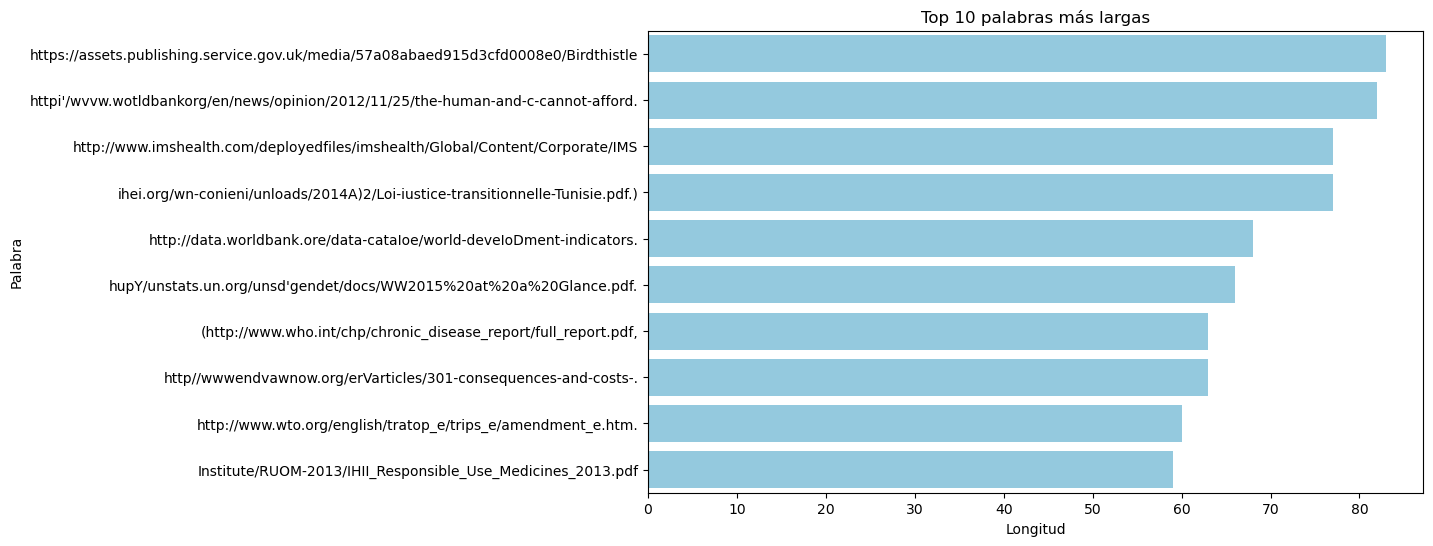

In [48]:
# Función para obtener las palabras más largas
def get_top_longest_words(corpus, n=10):
    words = ' '.join(corpus).split()
    words_lengths = [(word, len(word)) for word in words]
    words_lengths_sorted = sorted(words_lengths, key=lambda x: x[1], reverse=True)
    return words_lengths_sorted[:n]

longest_words = get_top_longest_words(df['Textos_espanol'], 10)
words = [word[0] for word in longest_words]
lengths = [length[1] for length in longest_words]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=lengths, y=words, color="skyblue")  # Cambiar palette a color
plt.title('Top 10 palabras más largas')
plt.xlabel('Longitud')
plt.ylabel('Palabra')
plt.show()


El análisis de las palabras más largas en la columna "Textos_espanol" muestra que la mayoría son enlaces web y URLs, como "https://assets.publishing.service.gov.uk/media/57a08abaed915d3cfd0008e0/Birdthistle" con 83 caracteres y "http://www.imshealth.com/deployedfiles/imshealth/Global/Content/Corporate/IMS" con 77 caracteres. Estos datos, debido a su naturaleza, no aportan información relevante para el análisis del contenido textual y pueden introducir ruido en el modelo. Por lo tanto, se planifica limpiar estos elementos durante el preprocesamiento de datos para mejorar la calidad del análisis y la efectividad del modelo de machine learning.

# 2. Preparación de datos
En la etapa de preparación de datos, se realiza un exhaustivo proceso de limpieza y transformación para asegurar que los datos sean adecuados para el análisis y modelado. Esto incluye la corrección de errores en el formato de texto, la eliminación de datos irrelevantes como enlaces web, y la normalización de las palabras para estandarizar el texto

## 2.1 Eliminar registros que no están en español
En esta etapa, se ha implementado un proceso para identificar y eliminar registros que no están en español. Utilizando la librería langdetect, se ha aplicado una función para detectar el idioma de cada texto en la columna "Textos_espanol".

In [52]:
# Semilla para hacer que la detección sea reproducible
DetectorFactory.seed = 0

# Integrar tqdm con pandas
tqdm.pandas()
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

df_tofilter = df.copy()
def detect_language(text):
    try:
        return detect(text)
    except:
        return None


def deleteNonSpanish(df, print=False):
    df['language'] = df['Textos_espanol'].apply(detect_language)
    if print:
      #imprimir los idiomas
      display(df['language'].value_counts())
    df = df[df['language']=='es']
    return df
df_tofilter = deleteNonSpanish(df_tofilter, True)


language
es    4036
en       7
fr       6
Name: count, dtype: int64

Los resultados muestran que, de los 4049 registros originales, 4036 están en español, mientras que 13 registros están en inglés o francés.

Este proceso de filtrado es crucial para asegurar que el modelo de machine learning se entrene únicamente con datos relevantes para el idioma objetivo, en este caso, el español. La eliminación de textos en otros idiomas mejora la coherencia del análisis y la precisión del modelo, al evitar la introducción de ruido y garantizar que el contenido del dataset sea homogéneo en cuanto al idioma.

## 2.2 Tokenización
Se lleva a cabo un proceso de preprocesamiento del texto que incluye varios pasos. Primero, se sustituyen los signos de puntuación por espacios para facilitar la segmentación. Luego, se eliminan las palabras cortas de dos o menos letras que no se habían eliminado durante la filtración de stopwords. A continuación, se eliminan los caracteres no alfabéticos, se quitan los acentos y se transforma todo el texto a minúsculas para estandarizarlo. Finalmente, se filtran las stopwords, y todo este proceso se aplica al DataFrame, resultando en texto limpio y uniformizado, adecuado para análisis futuros.

In [55]:
# Función para cambiar caracteres
def changeCharacters(text):
    """Reemplaza algunos separadores por espacios"""
    text = text.replace(',', ' ')
    text = text.replace('/', ' ')
    text = text.replace('.', ' ')
    text = text.replace('-', ' ')
    text = text.replace('\n', ' ')
    text = text.replace('!', ' ')
    return text

# Función para eliminar palabras muy cortas
def deleteWrongWords(words):
    """Elimina palabras de dos o menos caracteres que no se eliminaron en los stopwords"""
    return [word for word in words if len(word) > 2]

# Función para filtrar caracteres innecesarios
def filterWords(text):
    """Elimina caracteres innecesarios, solo quedan palabras"""
    whitelist = set("abcdefghijklmnñopqrstuvwxyz ")
    return "".join(filter(whitelist.__contains__, text))

# Función para remover acentos
def remove_accents(text):
    """Elimina letras con tilde"""
    text = text.replace("á", "a")
    text = text.replace("é", "e")
    text = text.replace("í", "i")
    text = text.replace("ó", "o")
    text = text.replace("ú", "u")
    return text

# Función para convertir a minúsculas
def to_lowercase(words):
    """Convierte strings a minúscula"""
    return words.lower()

# Cargar stopwords
stopword = nltk.corpus.stopwords.words('spanish')

# Función para remover stopwords
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stopword]

# Función de preprocesamiento
def preprocessing(text):
    text = changeCharacters(text)
    text = to_lowercase(text)
    text = remove_accents(text)
    text = filterWords(text)
    return text


In [56]:
df_t = df_tofilter.copy()
df_t['words'] = df_t['Textos_espanol'].apply(preprocessing)
df_t['words'] = df_t['words'].apply(word_tokenize)
df_t['words'] = df_t['words'].apply(remove_stopwords)
df_t['words'] = df_t['words'].apply(deleteWrongWords)
df_t

,Textos_espanol,sdg,language,words
0,"Por ejemplo, el numero de consultas externas d...",3,es,"[ejemplo, numero, consultas, externas, especia..."
1,"En 2007, el gobierno central financió directam...",3,es,"[gobierno, central, financio, directamente, so..."
2,"Claramente, hay muchos otros factores en juego...",3,es,"[claramente, factores, juego, particular, vari..."
3,"Por ejemplo, el estado australiano de Victoria...",3,es,"[ejemplo, australiano, victoria, creo, agencia..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,es,"[consumo, anual, alcohol, estima, litros, año,..."
...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,es,"[ello, identificara, cuestiones, genero, mas, ..."
4045,La participación de las mujeres en roles de li...,5,es,"[participacion, mujeres, roles, liderazgo, den..."
4046,"Según el WEF, según las tendencias de 2016, po...",5,es,"[segun, wef, segun, tendencias, podria, cerrar..."
4047,"Sirve como recurso y foro para las agencias, c...",5,es,"[sirve, recurso, foro, agencias, objetivo, log..."


El resultado de este proceso es un conjunto de datos en el que cada texto ha sido transformado en una lista de palabras limpias y normalizadas. Este texto tokenizado, libre de caracteres innecesarios y stopwords.

## 2.3 Eliminar nulos

En esta etapa, se realiza la eliminación de valores nulos en la columna 'words' del DataFrame para asegurar que los datos sean completos y consistentes.

In [60]:
df_t.shape

(4036, 4)

In [61]:
df_t['words'].dropna()
df_t.shape

(4036, 4)

Después de intentar eliminar los valores nulos, se observa que el tamaño del DataFrame se mantiene sin cambios, indicando que no había valores nulos en la columna 'words'. 

## 2.4 Normalización
En esta etapa, se aplica la lematización para estandarizar las palabras en la columna 'words' del DataFrame. Utilizando el modelo de lematización en español de spaCy, se lematizan los verbos, manteniendo las palabras con menos de cuatro letras en su forma original. La función de lematización se aplica a cada entrada en la columna, actualizando así los textos con sus formas base correspondientes.

In [64]:
import spacy

lemmatizer = spacy.load("es_core_news_sm")

def lemmatize_verbs(words):
    doc = lemmatizer(" ".join(words))
    return [token.lemma_ for token in doc]

df_t['words'] = df_t['words'].apply(lemmatize_verbs)
df_t

,Textos_espanol,sdg,language,words
0,"Por ejemplo, el numero de consultas externas d...",3,es,"[ejemplo, numero, consulta, externo, especiali..."
1,"En 2007, el gobierno central financió directam...",3,es,"[gobierno, central, financio, directamente, so..."
2,"Claramente, hay muchos otros factores en juego...",3,es,"[claramente, factor, juego, particular, varied..."
3,"Por ejemplo, el estado australiano de Victoria...",3,es,"[ejemplo, australiano, victoria, creer, agenci..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,es,"[consumo, anual, alcohol, estimar, litro, año,..."
...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,es,"[él, identificara, cuestión, genero, mas, dest..."
4045,La participación de las mujeres en roles de li...,5,es,"[participacion, mujer, rol, liderazgo, dentro,..."
4046,"Según el WEF, según las tendencias de 2016, po...",5,es,"[segun, wef, segun, tendencia, podrio, cerrar ..."
4047,"Sirve como recurso y foro para las agencias, c...",5,es,"[servir, recurso, foro, agencia, objetivo, log..."


Después de aplicar la lematización, se convierte la lista de lemas en una cadena de texto para cada entrada del DataFrame, consolidando el resultado final.

In [66]:
df_t['words'] = df_t['words'].apply(lambda x: ' '.join(map(str, x)))
df_t

,Textos_espanol,sdg,language,words
0,"Por ejemplo, el numero de consultas externas d...",3,es,ejemplo numero consulta externo especialista c...
1,"En 2007, el gobierno central financió directam...",3,es,gobierno central financio directamente solo ga...
2,"Claramente, hay muchos otros factores en juego...",3,es,claramente factor juego particular variedad ba...
3,"Por ejemplo, el estado australiano de Victoria...",3,es,ejemplo australiano victoria creer agencia pro...
4,"El consumo anual de alcohol se estima en 15,7 ...",3,es,consumo anual alcohol estimar litro año hombre...
...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,es,él identificara cuestión genero mas destacado ...
4045,La participación de las mujeres en roles de li...,5,es,participacion mujer rol liderazgo dentro legis...
4046,"Según el WEF, según las tendencias de 2016, po...",5,es,segun wef segun tendencia podrio cerrar él den...
4047,"Sirve como recurso y foro para las agencias, c...",5,es,servir recurso foro agencia objetivo lograr en...


Finalmente, la columna 'words' muestra las palabras lematizadas en lugar de las formas originales, lo que facilita el análisis posterior al reducir la variabilidad lingüística y mantener la consistencia en el tratamiento del texto.

Por último, se realiza la comparación entre el primer documento antes de la limpieza y después, como se logra ver a continuación

In [69]:
print(df_t['Textos_espanol'][0])
print("------------------------------------------------------------------------------------\n")
print(df_t['words'][0])

Por ejemplo, el numero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparacion con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblacion ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El numero de recetas que no pudieron ser surtidas en su totalidad por un farmaceutico debido a la falta de existencias es de 33% dentro del SP en comparacion con 14% dentro del IMSS segun los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mas altas de recetas surtidas). Ambas cifras se encuentran entre las mas altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.
----------------------------------------------------------------

## 2.5 Vectorización

La etapa de vectorización convierte los textos en representaciones numéricas que pueden ser utilizadas por modelos de machine learning. Esta etapa incluye tres pasos principales: la creación de la matriz de características utilizando TF-IDF, la balanceación de clases con SMOTE, y la preparación final de los datos para el análisis.

### 2.5.0 Preparación para la vectorización

In [72]:
X_data, y_data = df_t['words'],df_t['sdg']
y_data

0       3
1       3
2       3
3       3
4       3
       ..
4044    5
4045    5
4046    5
4047    5
4048    5
Name: sdg, Length: 4036, dtype: int64

In [73]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(4036, 14652)


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### 2.5.1 Creación de la matriz de características TF-IDF
Se emplea el TfidfVectorizer para transformar los textos en una representación numérica que refleje la importancia de las palabras en cada documento, considerando tanto la frecuencia de término (TF) como la frecuencia inversa de documento (IDF).

In [75]:
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(X_data)
print(X_tf_idf.shape)

(4036, 14652)


La matriz resultante tiene dimensiones (4036, 14652), lo que indica que hay 4036 documentos y 14652 características (palabras). Esto refleja una representación detallada de los textos, donde cada fila corresponde a un documento y cada columna a una palabra en el vocabulario.

Ahora se mostrará un ejemplo de los valores TF-IDF para algunas palabras del primer documento:

In [78]:
# Imprime los valores TF-IDF para las palabras del primer documento
index_to_word = {idx: word for word, idx in tf_idf.vocabulary_.items()}

first_document_tfidf = X_tf_idf[0].toarray().flatten()
for idx, tfidf_value in enumerate(first_document_tfidf):
    if tfidf_value != 0:
        word = index_to_word[idx]
        print(f"Word: {word}, TF-IDF value: {tfidf_value}")

Word: alto, TF-IDF value: 0.11263615844185781
Word: ambos, TF-IDF value: 0.09527969175969549
Word: aunque, TF-IDF value: 0.0699998407411953
Word: bien, TF-IDF value: 0.06980906049965
Word: bolsillo, TF-IDF value: 0.1160766525013015
Word: cada, TF-IDF value: 0.1321515229641754
Word: cifra, TF-IDF value: 0.218610566285354
Word: cobertura, TF-IDF value: 0.09527969175969549
Word: comparacion, TF-IDF value: 0.1580251152882847
Word: consulta, TF-IDF value: 0.10705512315131413
Word: dato, TF-IDF value: 0.06399455253051164
Word: debido, TF-IDF value: 0.08070484066025646
Word: decado, TF-IDF value: 0.09054719004967651
Word: dentro, TF-IDF value: 0.15099603674501788
Word: derechohabient, TF-IDF value: 0.33673829412438966
Word: desigual, TF-IDF value: 0.10542461082625736
Word: diferencia, TF-IDF value: 0.07618724635430847
Word: ejemplo, TF-IDF value: 0.05554013973745537
Word: encontrar, TF-IDF value: 0.07931890573171876
Word: encuesta, TF-IDF value: 0.0844699864683739
Word: esfuerzo, TF-IDF value

### 2.5.2 Preparación de los datos
Se convierte la matriz dispersa de TF-IDF en un DataFrame para facilitar el análisis y la manipulación de los datos:

In [80]:
data_prep = X_tf_idf.copy().todense()
data_prep = pd.DataFrame(data_prep, columns=tf_idf.vocabulary_.keys())
data_prep.columns

Index(['ejemplo', 'numero', 'consulta', 'externo', 'especialista', 'cada',
       'mil', 'derechohabient', 'comparacion', 'imss',
       ...
       'heterodoxo', 'redefinido', 'esperada', 'identificara', 'arrojarar',
       'rrd', 'sintonia', 'wef', 'complementacion', 'incrustar'],
      dtype='object', length=14652)

In [81]:
data_prep["sdg"] = y_data
data_prep.columns

Index(['ejemplo', 'numero', 'consulta', 'externo', 'especialista', 'cada',
       'mil', 'derechohabient', 'comparacion', 'imss',
       ...
       'redefinido', 'esperada', 'identificara', 'arrojarar', 'rrd',
       'sintonia', 'wef', 'complementacion', 'incrustar', 'sdg'],
      dtype='object', length=14653)

In [82]:
data_prep.shape

(4036, 14653)

In [83]:
data_prep.duplicated().sum()

0

In [84]:
 data_prep = data_prep.drop_duplicates()

Con esto termina la preparación de los datos, habiendo eliminado las filas duplicadas y creado la matriz TF-IDF con los valores resultado para cada palabra y documento.

### 2.5.3 Análisis de la distribución TF-IDF
Se genera un histograma para analizar la distribución de los valores TF-IDF a través de diferentes documentos

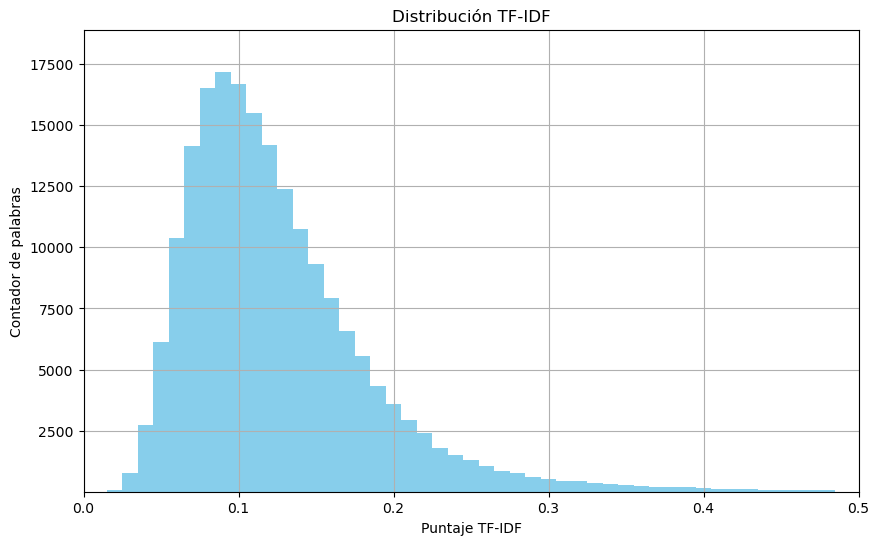

In [87]:
# Creamos un histograma para ver la distribución de valores tf_idf
tf_idf_scores = X_tf_idf.toarray()

# Aplanar el array y eliminar los ceros
tf_idf_scores_flat = tf_idf_scores.flatten()[tf_idf_scores.flatten() != 0]

# Crear los bins con un rango reducido (ajusta según sea necesario)
bin_edges = np.arange(0, 0.5, 0.01)  # Enfocado en el rango [0, 0.5]

# Calcular el histograma
hist, bins = np.histogram(tf_idf_scores_flat, bins=bin_edges)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist, width=0.01, color='skyblue')


plt.xlim(0, 0.5)  
plt.ylim(1, max(hist) * 1.1)  

# Añadir etiquetas y título
plt.xlabel('Puntaje TF-IDF')
plt.ylabel('Contador de palabras')
plt.title('Distribución TF-IDF')
plt.grid(True)

# Mostrar la gráfica
plt.show()

La gráfica muestra la distribución de los valores TF-IDF (Term Frequency-Inverse Document Frequency) en el conjunto de datos, donde el eje X representa los valores de TF-IDF, que varían entre 0 y 0.5, y el eje Y indica la cantidad de palabras que corresponden a cada rango de TF-IDF. La mayoría de las palabras tienen un valor de TF-IDF cercano a 0.1, lo que sugiere que son comunes en muchos documentos y, por lo tanto, menos representativas de un documento específico. A medida que los valores de TF-IDF aumentan, la cantidad de palabras disminuye, lo que indica que solo unas pocas palabras tienen un valor más alto, lo que las hace más relevantes para algunos documentos en particular. Esta distribución asimétrica es típica en análisis de texto, donde la mayoría de las palabras son de uso generalizado, y solo unas pocas destacan como representativas de contenido específico dentro de los textos.

#### 2.5.4 Exportación de datos
Finalmente, se eliminan las variables utilizadas para el analisis TF-IDF y además se guarda el DataFrame preparado en un archivo CSV para su uso posterior:

In [90]:
del tf_idf_scores_flat, bin_edges, hist, bins, X_tf_idf, tf_idf, df_t
#data_prep.to_csv("datos_procesados.csv", index=False)

# 3. Modelado

## 3.1 Algoritmo de Regresión Logística (Santiago Osorio)

### 3.1.0 Descripción del Algoritmo

La regresión logística es un algoritmo de aprendizaje supervisado utilizado principalmente para la tarea de clasificación. Su propósito es predecir la probabilidad de que un evento ocurra, lo cual resulta en la clasificación de una observación en una categoría específica. En este caso, el modelo predice si una observación pertenece a una clase particular o no, lo que lo hace ideal para problemas de clasificación binaria.

Aunque generalmente se usa en tareas binarias, la regresión logística puede extenderse a problemas multiclase mediante la técnica One-vs-Rest (OvR), que consiste en entrenar un modelo por cada clase. Para cada clase, se evalúa si una observación pertenece a esa clase o a una "nueva clase" que agrupa a todas las demás. Así, aunque el problema tenga múltiples categorías, cada modelo trabaja con solo dos clases: la clase objetivo y "el resto".

Matemáticamente, la regresión logística se basa en la función sigmoidea:

$$f(x) = \frac{1}{1 + e^{-x}}$$
Esta función transforma cualquier valor real en un rango entre 0 y 1, representando una probabilidad. En el modelo, la probabilidad de una clase positiva se calcula utilizando una expresión similar a una regresión lineal:

$$y = \frac{e^{(b_0 \ + \ b_1X)}}{1 + e^{(b_0 \ + \ b_1X)}}$$

Donde $b_0$ es el sesgo (bias) y $b_1$ es el coeficiente de la variable $X$. A medida que $X$
X aumenta, la función sigmoidea se aproxima a 1, lo que implica una mayor probabilidad de que el evento ocurra.

Para clasificación multiclase con OvR, se entrena un modelo para cada clase y, durante la predicción, se elige el modelo con la mayor probabilidad de clase positiva.

El entrenamiento del modelo implica encontrar los valores óptimos de los parámetros $b_0$ y $b_1$ utilizando el método de descenso de gradiente estocástico (SGD) y la función de pérdida de entropía cruzada (cross-entropy loss), que mide la diferencia entre las probabilidades predichas y las clases reales.

Algunos supuestos clave para la aplicación de la regresión logística incluyen la independencia de las observaciones, la ausencia de multicolinealidad entre las variables explicativas, y una relación lineal entre las variables y el logaritmo de odds (logit). Además, es recomendable que el dataset sea linealmente separable.

Para la optimización del modelo, se pueden ajustar varios hiperparámetros, como el solver (el algoritmo de optimización), la penalización (para evitar el sobreajuste), y la fortaleza de regularización $C$ (que controla la complejidad del modelo). La mejor combinación de estos hiperparámetros se determina mediante la búsqueda con validación cruzada, que evalúa distintas configuraciones en múltiples divisiones del conjunto de datos de entrenamiento, asegurando un modelo robusto y generalizable.

Finalmente, las métricas de evaluación para la regresión logística incluyen precisión, recall, F1-score y la matriz de confusión, las cuales proporcionan una visión integral del rendimiento del modelo.perplano en un numero finito de iteraciones.

#### Fuentes:
* https://web.stanford.edu/~jurafsky/slp3/5.pdf
* https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/
* https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69
* https://www.kaggle.com/code/satishgunjal/multiclass-logistic-regression-using-sklearn
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [99]:
data = data_prep.copy()

In [100]:
#Identificación de la etiqueta y de las variables explicativas
label = 'sdg'
features = data.columns.to_list()
features.remove(label)

In [101]:
data['sdg'].value_counts()

sdg
5.0    1433
4.0    1352
3.0    1238
Name: count, dtype: int64

In [102]:
data['sdg'].value_counts()

sdg
5.0    1433
4.0    1352
3.0    1238
Name: count, dtype: int64

Ahora se revisarán los valores nulos para las filas y las columnas

In [104]:
data.isnull().any(axis=1).sum()

13

In [105]:
data.isnull().any(axis=0).sum()

1

Existe una columna nula y 13 filas nulas, por lo que se decide que es mejor borrarlas para que no puedan llegar a afectar al modelo.

In [107]:
data = data.dropna(axis=0)
data = data.dropna(axis=1)

Ahora se comprueba que efectivamente se hayan eliminado los valores nulos para los datos.

In [109]:
data.isnull().any(axis=1).sum()

0

In [110]:
data.isnull().any(axis=0).sum()

0

Luego se comprueba la variación de la columna objetivo para ver como pudieron haber influido la eliminación de valores nulos.

Después de haber eliminado los nulos se procede a cambiar el tipo de dato de sdg a entero.

In [113]:
data['sdg'] = data['sdg'].astype(int)

In [114]:
data['sdg'].value_counts()

sdg
5    1433
4    1352
3    1238
Name: count, dtype: int64

In [115]:
data['sdg']

0       3
1       3
2       3
3       3
4       3
       ..
4031    5
4032    5
4033    5
4034    5
4035    5
Name: sdg, Length: 4023, dtype: int32

Se evidencia entonces, que la columna sdg está en perfecto estado después de las modificaciones

Luego, se procede a revisar si existen duplicados

In [118]:
data.duplicated().sum()

0

Efectivamente, no hay duplicados. 

Ahora se revisan los duplicados para las features.

In [120]:
data[features].duplicated().sum()

0

No existen duplicados para features. 

Ahora se procede a revisar la forma que tienen los datos.

In [122]:
data.shape

(4023, 14653)

Existen entonces 4023 filas con 14563 columnas despues de haber realizado la última limpieza.

### 3.1.1 Análisis de colinealidad entre las variables
En este modelo, se asume que existe independencia y no multicolinealidad entre las variables explicativas. Esto se justifica porque las palabras en los textos, que representan nuestras variables explicativas, tienen baja correlación entre sí,  especialmente después del preprocesamiento que eliminó stopwords, conectores y palabras comunes.  Calcular la correlación entre más de 14,000 variables sería computacionalmente costoso, y hacerlo de manera exhaustiva podría eliminar  variables importantes para el modelo, lo cual afectaría negativamente el desempeño.  Aunque se intentó eliminar variables correlacionadas, se observó una pérdida de información importante, por lo que este proceso ha quedado descartado en esta implementación.

Ejemplo del código que fue descartado:


El siguiente código generaba un mapa de correlación y eliminaba las variables correlacionadas, pero fue descartado porque redujo la calidad del modelo al eliminar información relevante.

In [125]:
# # Configuración para encontrar variables correlacionadas
# minimum_corr = 0.6
# plt.figure(figsize=(12, 10))
# columns_heatmap = features.copy()
# correlation_map = data[columns_heatmap].corr().abs().applymap(lambda x: 0 if (x < minimum_corr) else 1)
#
# # Lista de tuplas con variables correlacionadas
# correlated_cols = set()
# for i, col in enumerate(columns_heatmap):
#     for j, col2 in enumerate(columns_heatmap):
#         if j < i and correlation_map.loc[col, col2] == 1:
#             correlated_cols.add(col)
#
# # Eliminar las variables correlacionadas
# for col in correlated_cols:
#     data = data.drop(col, axis=1)
# features = data.columns.to_list()
# features.remove(label)

In [126]:
# Verificación de duplicados
print("Duplicados en las features: ", data[features].duplicated().sum())
print("Duplicados totales: ", data.duplicated().sum())
print("Dimensiones del conjunto de datos: ", data.shape)
print(data.columns)
data["sdg"].value_counts()

Duplicados en las features:  0
Duplicados totales:  0
Dimensiones del conjunto de datos:  (4023, 14653)
Index(['ejemplo', 'numero', 'consulta', 'externo', 'especialista', 'cada',
       'mil', 'derechohabient', 'comparacion', 'imss',
       ...
       'redefinido', 'esperada', 'identificara', 'arrojarar', 'rrd',
       'sintonia', 'wef', 'complementacion', 'incrustar', 'sdg'],
      dtype='object', length=14653)


sdg
5    1433
4    1352
3    1238
Name: count, dtype: int64

### 3.1.2 Manejo de valores atípicos:
Para cumplir con el supuesto de que los valores atípicos extremos no afecten el rendimiento del modelo, se evaluará cuánto impacto tendrían en la calidad del modelo. Si se pierde demasiada información, se preferirá mantenerlos, ya que aunque sean lejanos, podrían representar patrones válidos en los datos.

In [128]:
# Proceso de eliminación de valores atípicos sobre una copia de los datos para evaluación.
# dataTest = data.copy()
#
# for feature in features:
#     # Definir los límites basados en el rango intercuartílico
#     q1 = dataTest[feature].quantile(0.25)
#     q3 = dataTest[feature].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#
#     # Filtrar los datos que están dentro de los límites
#     valid = (dataTest[feature] >= lower_bound) & (dataTest[feature] <= upper_bound)
#     dataTest = dataTest[valid]
#


Luego de revisar el modelo, se llega a la conclusión de que funciona mejor con los valores atípicos, por lo que se decide comentar el código y seguir con el proceso de modelado.

Ya con estas preparaciones extra se puede continuar con la separación de los datos en los conjuntos de entrenamiento y prueba.

### 3.1.3 Definición del modelo y Parametrización
Se lleva a cabo un proceso de selección y optimización de hiperparámetros para un modelo de Regresión Logística, utilizando validación cruzada. Con la herramienta GridSearchCV, se busca determinar la mejor combinación de hiperparámetros, como la intensidad de la regularización y el algoritmo de optimización, con el objetivo de maximizar la precisión del modelo. La validación cruzada, implementada mediante KFold, asegura una evaluación más sólida del modelo al dividir el conjunto de datos en varias partes para su uso iterativo en entrenamiento y validación, reduciendo así el riesgo de sobreajuste. Al finalizar el proceso, se obtienen los hiperparámetros óptimos que mejoran el rendimiento del modelo, lo cual se refleja en su capacidad para clasificar correctamente nuevas instancias basándose en los datos de entrenamiento.

```
Best params:  {'C': 800, 'penalty': 'l2', 'solver': 'newton-cg'}
```


In [131]:
#División del conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data[features], data[label], test_size=0.2, random_state=1)


In [132]:
params_logreg = {'C': [800],
                 'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty': ['l2']}

particiones = KFold(n_splits=10, shuffle=True, random_state=0)
linearR = LogisticRegression()
linearR = GridSearchCV(linearR, params_logreg, cv=particiones, n_jobs=-1, scoring='f1_weighted')
linearR.fit(x_train, y_train)

print("Best params: ", linearR.best_params_)
print("Score: ", linearR.best_score_)

Best params:  {'C': 800, 'penalty': 'l2', 'solver': 'liblinear'}
Score:  0.728009585997166


### 3.1.4 Predicción de clasificaciones
Se realizan predicciones de clasificación con el modelo de Regresión Logística previamente entrenado. Primero, se utiliza el conjunto de entrenamiento (x_train) para predecir las clasificaciones correspondientes y se almacenan en y_pred_train. Luego, se repite el proceso con el conjunto de prueba (x_test), guardando las predicciones en y_pred_test.

In [134]:
y_pred_train = linearR.predict(x_train)
y_pred_test = linearR.predict(x_test)

### 3.1.5 Métricas de entrenamiento
Se observa que el modelo ha alcanzado una precisión, recall y puntuación F1 perfectas de 1.00 para cada una de las tres clases, lo que indica que ha clasificado correctamente todas las instancias del conjunto de entrenamiento. La precisión es la proporción de identificaciones positivas verdaderas entre todas las identificaciones positivas (tanto verdaderas como falsas), mientras que el recall mide la proporción de positivos verdaderos identificados correctamente. La puntuación F1 es el promedio armónico de la precisión y el recall, ofreciendo un balance entre ambos. La precisión global del modelo también es del 100%, lo cual es excepcionalmente alto.

In [136]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       982
           4       1.00      1.00      1.00      1092
           5       1.00      1.00      1.00      1144

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



Se realiza una matriz de confusión sobre el modelo de entrenamiento, donde se puede ver que los resultados corresponden a un precisión de 100%.

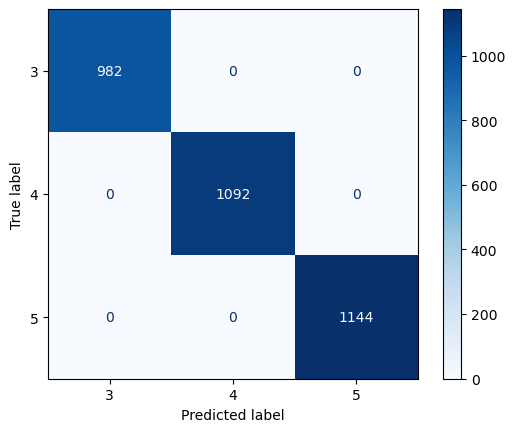

In [138]:
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linearR.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

### 3.1.6 Métricas de testing

In [140]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           3       0.73      0.73      0.73       256
           4       0.74      0.79      0.76       260
           5       0.78      0.74      0.76       289

    accuracy                           0.75       805
   macro avg       0.75      0.75      0.75       805
weighted avg       0.75      0.75      0.75       805



Se realiza una matriz de confusión sobre el modelo de entrenamiento, donde se puede ver como varían los resultados a través de las clases

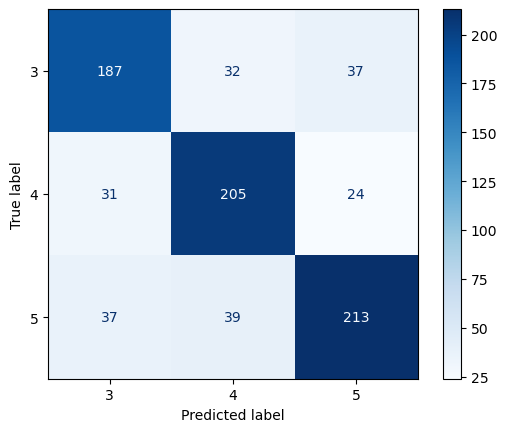

In [142]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linearR.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

### 3.1.7 Comparaciones finales
Por último se realiza la comparación entre los resultados del set de entrenamiento y el de pruebas

In [144]:
print("Resultados set de entrenamiento\n")
print(classification_report(y_train, y_pred_train))
print("------------------------------------------------------------------\n")
print("Resultados set de prueba\n")
print(classification_report(y_test, y_pred_test))

Resultados set de entrenamiento

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       982
           4       1.00      1.00      1.00      1092
           5       1.00      1.00      1.00      1144

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218

------------------------------------------------------------------

Resultados set de prueba

              precision    recall  f1-score   support

           3       0.73      0.73      0.73       256
           4       0.74      0.79      0.76       260
           5       0.78      0.74      0.76       289

    accuracy                           0.75       805
   macro avg       0.75      0.75      0.75       805
weighted avg       0.75      0.75      0.75       805



Basándonos en los resultados de la Regresión Logística, podemos observar una notable diferencia entre el rendimiento en el conjunto de entrenamiento y el de prueba.

En el conjunto de entrenamiento, el modelo tiene un desempeño perfecto, alcanzando un 100% de precisión, recall y f1-score en todas las clases (3, 4 y 5). Esto indica que el modelo ajustó extremadamente bien los datos de entrenamiento, clasificando correctamente todas las instancias. Sin embargo, esta alta precisión en el entrenamiento podría ser una señal de sobreajuste, ya que el modelo parece haber memorizado los datos sin generalizar bien.

Al pasar al conjunto de prueba, el rendimiento del modelo disminuye considerablemente:

Para la clase 3, la precisión, recall y f1-score bajan a 0.73.
Para la clase 4, el modelo alcanza mejores resultados, con un 0.76 en f1-score, debido a un recall más alto de 0.79.
La clase 5 tiene un desempeño intermedio, con un f1-score de 0.76, ligeramente por debajo de la clase 4.
En términos generales, el accuracy en el conjunto de prueba es del 75%, lo que indica que el modelo tiene un desempeño aceptable, aunque lejos de ser perfecto. Esto sugiere que el modelo tiene dificultades para clasificar correctamente nuevas instancias, especialmente en comparación con el rendimiento en el conjunto de entrenamiento.

Además, las métricas promedio ponderadas y macro muestran valores similares, lo que refleja una distribución equilibrada de las clases en términos de rendimiento. Sin embargo, la disminución en todas las métricas en el conjunto de prueba, en comparación con el entrenamiento, indica que el modelo no generaliza perfectamente y que existe margen para mejorar, ya sea afinando hiperparámetros o explorando otras técnicas de regularización o modelos.

In [146]:
del data, y_pred_test, y_test, y_train, y_pred_train

## 3.2 Modelo Naive Bayes (Juan Andres Eslava)

### 3.2.0 Descripción del Algoritmo

El algoritmo **Naive Bayes** es un clasificador probabilístico basado en el teorema de Bayes, el cual utiliza una fuerte suposición de independencia entre las características. A pesar de esta simplificación, Naive Bayes ha demostrado ser sorprendentemente eficaz para una amplia gama de problemas de clasificación, especialmente en áreas como el procesamiento de lenguaje natural y la detección de spam.

### Fórmula del Teorema de Bayes

El teorema de Bayes describe la probabilidad de que ocurra un evento, dado que otro evento ya ha ocurrido. Se expresa de la siguiente manera:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Donde:
- \( P(A|B) \) es la probabilidad de que ocurra \( A \) dado que ocurrió \( B \) (probabilidad posterior).
- \( P(B|A) \) es la probabilidad de que ocurra \( B \) dado que ocurrió \( A \) (probabilidad verosímil).
- \( P(A) \) es la probabilidad previa de \( A \) (probabilidad a priori).
- \( P(B) \) es la probabilidad de que ocurra \( B \).

### Clasificación con Naive Bayes

El algoritmo de Naive Bayes utiliza el teorema de Bayes para calcular la probabilidad de que una instancia pertenezca a una determinada clase, dado su conjunto de características. La clasificación se realiza determinando la clase con la mayor probabilidad posterior.

En el contexto de clasificación, el teorema de Bayes se reformula para encontrar la probabilidad de que una observación con características \(x_1, x_2, ..., x_n\) pertenezca a una clase \(C_k\), así:

$$
P(C_k | x_1, x_2, ..., x_n) = \frac{P(x_1, x_2, ..., x_n | C_k) \cdot P(C_k)}{P(x_1, x_2, ..., x_n)}
$$

Dado que \( P(x_1, x_2, ..., x_n) \) es constante para todas las clases, el modelo predice la clase \( C_k \) que maximiza la siguiente expresión:

$$
P(C_k | x_1, x_2, ..., x_n) \propto P(C_k) \prod_{i=1}^{n} P(x_i | C_k)
$$

Aquí es donde entra la suposición de independencia: se asume que todas las características \(x_i\) son independientes entre sí, dada la clase \(C_k\). Aunque esta suposición rara vez es cierta en la práctica, el clasificador Naive Bayes tiende a funcionar bien incluso cuando las características están correlacionadas.

### Tipos de Naive Bayes

Existen varias implementaciones de Naive Bayes, que varían según la naturaleza de los datos:

1. **Gaussian Naive Bayes**:
   - Se asume que las características siguen una distribución normal (gaussiana).
   - Adecuado para características continuas.
   
   Fórmula de la distribución gaussiana:

   $$
   P(x_i | C_k) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
   $$

2. **Multinomial Naive Bayes**:
   - Adecuado para datos discretos, como la frecuencia de palabras en un documento.
   - Es común en problemas de clasificación de texto, como la detección de spam.

3. **Bernoulli Naive Bayes**:
   - Similar al multinomial, pero en lugar de contar las ocurrencias de las características, solo considera si una característica está presente o no.
   - Se usa frecuentemente en problemas binarios (presencia o ausencia de características).

### Ventajas del Naive Bayes

1. **Simplicidad**: El algoritmo es fácil de implementar y computacionalmente eficiente.
2. **Escalabilidad**: Naive Bayes se adapta bien a conjuntos de datos grandes y de alta dimensión.
3. **Rendimiento sorprendente**: A pesar de la suposición de independencia entre características, Naive Bayes puede funcionar sorprendentemente bien, incluso en problemas complejos.

### Limitaciones

1. **Suposición de independencia**: La principal debilidad del algoritmo radica en la suposición de que las características son independientes entre sí, lo cual rara vez ocurre en el mundo real.
2. **Poca flexibilidad**: El clasificador Naive Bayes es menos flexible en comparación con otros algoritmos como árboles de decisión o modelos basados en distancia, ya que solo considera la relación probabilística entre las características y las clases.
3. **Datos pequeños**: Cuando se tiene un conjunto de datos muy pequeño o con datos insuficientes para una clase específica, Naive Bayes puede dar predicciones poco confiables debido a probabilidades de cero.

### Aplicaciones

1. **Detección de spam**: Clasificación de correos electrónicos como spam o no spam, basándose en las palabras que contiene el correo.
2. **Clasificación de texto**: Organizar documentos en diferentes categorías, como noticias, reseñas o temas específicos.
3. **Análisis de sentimiento**: Determinar si una opinión expresada en un texto es positiva o negativa.



### Fuentes
1. Naive Bayes Classifier - Wikipedia: https://en.wikipedia.org/wiki/Naive_Bayes_classifier
2. Gaussian Naive Bayes in Scikit-Learn: https://scikit-learn.org/stable/modules/naive_bayes.html
3. An Introduction to Naive Bayes Classifier - Towards Data Science: https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

### 3.2.1 Definición del modelo y Parametrización

Se realiza una copia del conjunto de datos previamente preparado para evitar cambios en el conjunto original. Esto asegura que las operaciones posteriores no afecten la integridad de los datos

In [151]:
data = data_prep.copy()

En este paso, se define la variable objetivo (label), que en este caso es sdg, y las características independientes (features). Se eliminan las columnas irrelevantes para el modelo.

In [153]:
label = 'sdg'
features = data.columns.to_list()
features.remove(label)

El conjunto de datos se divide en dos partes: un 80% se utiliza para entrenamiento y el 20% restante para prueba. Esto permite evaluar el rendimiento del modelo en datos que no ha visto previamente. Además, se imprimen las dimensiones (número de filas y columnas) de los conjuntos de entrenamiento y prueba para asegurarse de que la división se haya realizado correctamente. Esto te da una idea clara de cuántos datos tienes en cada conjunto.

In [155]:
#División del conjunto de datos en entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(data[features], data[label], test_size=0.2, random_state=1)

In [156]:
X = data.drop(columns=['sdg']) 
y = data['sdg']

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las formas de los conjuntos divididos
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3228, 14652)
X_test shape: (808, 14652)
y_train shape: (3228,)
y_test shape: (808,)


Inicializamos el clasificador GaussianNB, que es una variante de Naive Bayes que asume una distribución normal para las características continuas.

In [158]:
# Inicializar el clasificador Naive Bayes
naive_bayes_classifier = GaussianNB()

Se define una lista de valores para el hiperparámetro var_smoothing, que controla la suavización de la probabilidad. Esta suavización es útil para evitar problemas con características que tienen muy pocos datos o valores de probabilidad cercanos a cero.

In [160]:
parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

Se identificaron valores nulos en las etiquetas (y_train), por lo que decidimos eliminarlos para evitar errores durante el entrenamiento del modelo:

In [162]:
print(X_train.isnull().sum())  # Verificar si hay NaN en las características
print(y_train.isnull().sum())  # Verificar si hay NaN en las etiquetas

ejemplo            0
numero             0
consulta           0
externo            0
especialista       0
                  ..
rrd                0
sintonia           0
wef                0
complementacion    0
incrustar          0
Length: 14652, dtype: int64
11


Eliminamos las filas correspondientes a etiquetas nulas para asegurar que los datos sean adecuados para el entrenamiento del modelo.

In [164]:
# Eliminar filas donde y_train tiene valores NaN
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()

# Verificar si todavía hay NaN en y_train después de la limpieza
print(y_train.isnull().sum())

0


Se utiliza GridSearchCV para ajustar el hiperparámetro var_smoothing, que suaviza las probabilidades en Naive Bayes, ayudando a prevenir problemas con probabilidades de cero. El mejor valor encontrado fue 1e-05.

In [166]:
grid_search = GridSearchCV(naive_bayes_classifier, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [167]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'var_smoothing': 1e-05}


Después de entrenar el modelo, realizamos predicciones tanto en el conjunto de entrenamiento como en el de prueba. Esto permite evaluar la precisión del modelo en ambos conjuntos.

In [169]:
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

Evaluamos el rendimiento del modelo en el conjunto de entrenamiento utilizando un reporte de clasificación que incluye precisión, recall y F1-score.

In [171]:
# Para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
print(classification_report(y_train, y_pred_train))

Métricas para el conjunto de entrenamiento:
              precision    recall  f1-score   support

         3.0       0.97      0.98      0.98       974
         4.0       0.94      1.00      0.97      1097
         5.0       1.00      0.94      0.97      1146

    accuracy                           0.97      3217
   macro avg       0.97      0.97      0.97      3217
weighted avg       0.97      0.97      0.97      3217



Evaluamos el rendimiento del modelo en el conjunto de entrenamiento utilizando un reporte de clasificación que incluye precisión, recall y F1-score.

In [173]:
# Convertir y_pred_test a un objeto de pandas para poder usar isnull()
y_pred_test_series = pd.Series(y_pred_test)

# Verificar en qué posiciones están los NaN en y_test
print("Valores NaN en y_test:")
print(y_test[y_test.isnull()])

# Verificar si hay NaN en y_pred_test
print("Valores NaN en y_pred_test:")
print(y_pred_test_series[y_pred_test_series.isnull()])

Valores NaN en y_test:
1764   NaN
324    NaN
Name: sdg, dtype: float64
Valores NaN en y_pred_test:
Series([], dtype: float64)


Se crean índices válidos para y_test, es decir, aquellos donde no existen valores nulos (NaN). Estos índices se utilizarán para filtrar tanto y_test como y_pred_test. Se reinician los índices de ambas series para que coincidan y así poder realizar comparaciones y operaciones de filtrado de manera correcta. Descripción: Se utilizan los índices válidos para eliminar los valores NaN de ambas series. El resultado son dos series limpias (y_test_clean y y_pred_test_clean) que se pueden utilizar para el cálculo de las métricas.



In [175]:
# Filtrar índices válidos solo en y_test, ya que y_pred_test no tiene NaN
valid_indices = ~y_test.isnull()

# Restablecer los índices para que coincidan
y_test_reset = y_test.reset_index(drop=True)
y_pred_test_reset = y_pred_test_series.reset_index(drop=True)

# Filtrar ambos vectores para eliminar valores NaN de y_test y ajustar y_pred_test
y_test_clean = y_test_reset[valid_indices.reset_index(drop=True)]
y_pred_test_clean = y_pred_test_reset[valid_indices.reset_index(drop=True)]

# Verificar la forma de los nuevos vectores limpios
print("y_test_clean shape:", y_test_clean.shape)
print("y_pred_test_clean shape:", y_pred_test_clean.shape)

y_test_clean shape: (806,)
y_pred_test_clean shape: (806,)


### 3.1.2 Predicción de clasificaciones

In [177]:
# Para el conjunto de prueba
# Para el conjunto de prueba limpio
print("Métricas para el conjunto de prueba limpio:")
print(classification_report(y_test_clean, y_pred_test_clean))

Métricas para el conjunto de prueba limpio:
              precision    recall  f1-score   support

         3.0       0.58      0.53      0.56       264
         4.0       0.57      0.61      0.59       255
         5.0       0.58      0.57      0.58       287

    accuracy                           0.57       806
   macro avg       0.57      0.57      0.57       806
weighted avg       0.57      0.57      0.57       806



### 3.1.3 Comparaciones finales

Se genera la matriz de confusión utilizando los valores predichos (y_pred_test_clean) y los valores verdaderos (y_test_clean). Luego, se visualiza la matriz utilizando un gráfico con el color Blues para representar las intensidades de las casillas en la matriz.

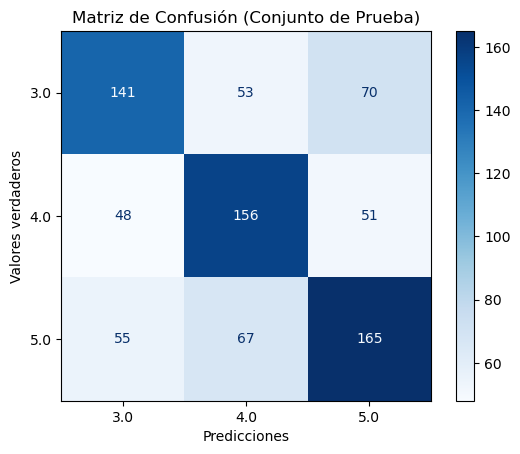

In [180]:
# Crear la matriz de confusión para el conjunto de prueba limpio
cm = confusion_matrix(y_test_clean, y_pred_test_clean)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión (Conjunto de Prueba)')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()


El modelo muestra un rendimiento bastante bueno en el conjunto de entrenamiento con un accuracy del 97%, lo que sugiere un ajuste excesivo. Sin embargo, en el conjunto de prueba, el rendimiento disminuye significativamente, con un accuracy del 57%, que es un rendimiento medio y f1-scores en el rango de 0.56-0.58. La matriz de confusión revela que el modelo confunde frecuentemente clases adyacentes, indicando problemas para distinguir entre ellas, sin embargo, la mayoría de las evaluadas, las logra desarrollar con exito. En resumen, el modelo presenta sobreajuste y problemas de generalización, que no están mal, pero sería necesario o una buena práctica explorar ajustes adicionales o probar otros algoritmos para mejorar su rendimiento en los datos de prueba.

In [182]:
del data, features, naive_bayes_classifier, y_pred_train, y_pred_test

## 3.3 Algoritmo de árbol de decisión (Alejandro Segura)

### 3.3.0 Descripción del Algoritmo
El algoritmo de árbol de decisión fue el único de los algoritmos de clasificación que aplicamos en este proyecto de los que estudiamos en clase. Los otros dos métodos utilizados son populares en la clasificación de textos, como se ve en este trabajo. Aun así, decidimos incluir el árbol de decisión como una referencia inicial y para comparar los resultados, además de familiarizarnos con su aplicación en la clasificación de textos.

El funcionamiento de este algoritmo se basa en la división del conjunto de datos según las características específicas de las variables. Los principales hiperparámetros a ajustar son la profundidad del árbol, que determina cuántas subdivisiones se realizarán, y las características o columnas de decisión. Para decidir dónde hacer las divisiones, se calcula el coeficiente de Gini o la entropía (dependiendo del criterio seleccionado) para cada una de las características, eligiendo aquella que presente el valor más relevante. Este proceso se repite tantas veces como lo permitan los datos y la profundidad configurada del árbol, hasta formar subconjuntos bien definidos para cada clase en la tarea de clasificación.

In [185]:
data = data_prep.copy()
label = 'sdg'
features = data.columns.to_list()
features.remove(label)

In [186]:
data = data.dropna(axis=0)
data = data.dropna(axis=1)

### 3.3.1 Definición del modelo y Parametrización

In [188]:
#División del conjunto de datos en entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(data[features], data[label], test_size=0.2, random_state=1)

In [189]:
# Definimos los parámetros sobre los que queremos realizar la búsqueda de grilla
param_grid = {
    'max_depth': [2000, 2061, 2250]  # Lista de valores de profundidad que queremos probar
}

# Creamos el objeto de árbol de decisión
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(estimator=arbol, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Ejecutamos la búsqueda de grilla en los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtenemos los resultados de la búsqueda
print("Mejor profundidad encontrada:", grid_search.best_params_['max_depth'])
print("F1 score del mejor modelo encontrado:", grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejor profundidad encontrada: 2000
F1 score del mejor modelo encontrado: 0.6719856817111612


In [190]:
# Entrenamos el modelo final con la mejor profundidad encontrada
best_depth = grid_search.best_params_['max_depth']
arbol_final = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=0)
arbol_final.fit(x_train, y_train)

# Determinamos las predicciones del modelo final sobre el conjunto test.
y_pred_final = arbol_final.predict(x_test)

# Calculamos el F1 score del modelo final sobre el conjunto test
f1_final = f1_score(y_test, y_pred_final, average='weighted')
print("F1 score del modelo final sobre el conjunto test:", f1_final)

F1 score del modelo final sobre el conjunto test: 0.6853748066479135


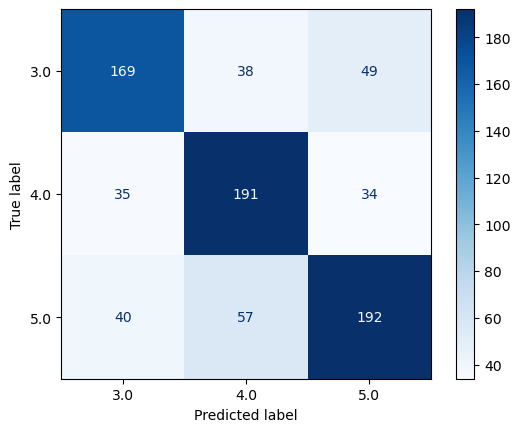

In [191]:
# Se genera la matriz de confusión
cm = confusion_matrix(y_test, y_pred_final)
# Se puede visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol_final.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [192]:
# Mostrar reporte de clasificación
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

         3.0       0.69      0.66      0.68       256
         4.0       0.67      0.73      0.70       260
         5.0       0.70      0.66      0.68       289

    accuracy                           0.69       805
   macro avg       0.69      0.69      0.69       805
weighted avg       0.69      0.69      0.69       805



In [193]:
del  param_grid, arbol, grid_search, best_depth, arbol_final, y_pred_final, data, x_train, x_test, y_train, y_test

# 4. Resultados

Teniendo en cuenta las métricas de Testing de los tres modelos, decidimos que regresión logística era el modelo más adecuado para la tarea. Como evidenciamos en el analisis de este, el modelo está clasificando correctamente una gran cantidad de registros para cada clase. Además es el modelo con métricas más altas, por lo que interpretamos que regresión logística es el más capaz de ofrecer un rendimiento sólido y equilibrado en términos de precisión y capacidad de clasificación para esta tarea específica.

Ahora se revisarán las palabras más significativas para cada ODS, esto nos ayudará a entender mejor como el modelo realizo su clasificación

In [197]:
data = data_prep.copy()
label = 'sdg'
features = data.columns.to_list()
features.remove(label)
data = data.dropna(axis=0)
data = data.dropna(axis=1)
#División del conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data[features], data[label], test_size=0.2, random_state=1)
params_logreg = {'C': [800],
                 'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty': ['l2']}

particiones = KFold(n_splits=10, shuffle=True, random_state=0)
linearR = LogisticRegression()
linearR = GridSearchCV(linearR, params_logreg, cv=particiones, n_jobs=-1, scoring='f1_weighted')
linearR.fit(x_train, y_train)
y_pred_train = linearR.predict(x_train)
y_pred_test = linearR.predict(x_test)
# Obtener el mejor modelo encontrado por GridSearchCV
best_model = linearR.best_estimator_

# Iterar sobre cada clase de ODS
for i, ods_class in enumerate(best_model.classes_):
    print(f"#################### Clase ODS {ods_class} ####################")
    
    # Obtener los coeficientes para la clase actual
    coefs = best_model.coef_[i].flatten()  # Coeficientes de la clase i
    
    # Obtener el signo de los coeficientes
    coefs_sign = coefs / abs(coefs)
    
    # Tomar el valor absoluto de los coeficientes
    coefs_abs = abs(coefs)
    
    # Ordenar los coeficientes para encontrar los más significativos
    top_indices = coefs_abs.argsort()[-20:]  # Selecciona los 20 más altos
    
    # Obtener las características (palabras) más importantes para esta clase
    top_features = x_train.columns[top_indices] 
    
    # Crear un DataFrame con la información de las palabras y sus coeficientes
    class_data = pd.DataFrame({'palabra': top_features, 
                               'coeficiente': coefs_abs[top_indices], 
                               'signo': coefs_sign[top_indices]})
    
    # Mostrar la tabla de características más importantes para la clase actual
    print(class_data)
    print()


#################### Clase ODS 3.0 ####################
          palabra  coeficiente  signo
0        maternal    10.079869    1.0
1       consultir    10.088350    1.0
2         inmuebl    10.151057    1.0
3   sensibilizado    10.184133    1.0
4          parado    10.493385    1.0
5       limitadas    10.675433    1.0
6           patto    10.834028    1.0
7          sostar    10.964242   -1.0
8          lentar    11.198060    1.0
9        ciclista    11.280876   -1.0
10      asesorado    11.331344    1.0
11           wood    11.368443   -1.0
12      divergent    11.674851   -1.0
13      talentoso    11.842651   -1.0
14       dignidad    11.971143    1.0
15          piano    12.970105   -1.0
16        traerir    13.768040    1.0
17      catastrof    15.399554    1.0
18        cuadrar    15.877566    1.0
19      bernhardt    16.124016   -1.0

#################### Clase ODS 4.0 ####################
         palabra  coeficiente  signo
0     importante    10.465263    1.0
1         orige

C:\Users\Santiago\AppData\Local\Temp\ipykernel_23572\2452123632.py:30: RuntimeWarning: invalid value encountered in divide
  coefs_sign = coefs / abs(coefs)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_23572\2452123632.py:30: RuntimeWarning: invalid value encountered in divide
  coefs_sign = coefs / abs(coefs)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_23572\2452123632.py:30: RuntimeWarning: invalid value encountered in divide
  coefs_sign = coefs / abs(coefs)


Teniendo los resultados de las palabras más importantes para cada ODS, se realizará una descripción general de los resultados.

### Análisis completos de los resultados
El modelo de regresión logística ha mostrado un rendimiento sólido en la clasificación de opiniones ciudadanas. Los resultados en el conjunto de prueba son los siguientes:

Precisión, Recall y F1-Score:
* ODS 3 (Salud y bienestar):
    - Precisión: 0.73
    - Recall: 0.73
    - F1-Score: 0.73
* ODS 4 (Educación de calidad):
    - Precisión: 0.74
    - Recall: 0.79
    - F1-Score: 0.76
* ODS 5 (Igualdad de género):
    - Precisión: 0.78
    - Recall: 0.74
    - F1-Score: 0.76
* Promedio General:
    - Precisión Macro: 0.75
    - Recall Macro: 0.75
    - F1-Score Macro: 0.75
    - Precisión Ponderada: 0.75
    - Recall Ponderado: 0.75
    - F1-Score Ponderado: 0.75

#### Análisis de Palabras Clave por Clase
Las palabras más frecuentes y sus coeficientes para cada ODS ofrecen una visión sobre qué términos son más influyentes en la clasificación:

* ODS 3 (Salud y bienestar):
    - Palabras como "maternal," "sensibilizado," y "dignidad" tienen coeficientes positivos, sugiriendo su asociación con este ODS.
    - Palabras como "ciclista" y "divergent" tienen coeficientes negativos, indicando menor relevancia para salud y bienestar.


* ODS 4 (Educación de calidad):

    - Términos como "importante," "adquirido," y "tolerada" son altamente relevantes y positivos para la educación.
    - Palabras como "oncológica" y "sacrificiir" tienen coeficientes negativos, reflejando menor relevancia para el contexto educativo.


* ODS 5 (Igualdad de género):
    - Palabras como "difundido," "antibacteriano," y "letalidad" son significativas y tienen coeficientes positivos en la clasificación para igualdad de género.
    - Palabras como "afectar" y "recibirar" muestran coeficientes negativos, sugiriendo asociación con contextos menos pertinentes para la igualdad de género.

#### Contribución a los Objetivos del Negocio
1. Mejora en la Precisión Predictiva: El modelo de regresión logística ha mostrado una precisión general del 75% en la clasificación de opiniones. Este desempeño permite una mejor predicción de avances y áreas de mejora en los ODS 3, 4 y 5, ayudando a identificar con mayor precisión los problemas relevantes.

2. Identificación de Áreas Críticas: La capacidad del modelo para identificar términos clave asociados con cada ODS proporciona una herramienta útil para las entidades gubernamentales y ONGs para focalizar sus esfuerzos en áreas críticas. Los coeficientes positivos y negativos de las palabras ofrecen una guía sobre qué aspectos se deben priorizar para abordar las problemáticas específicas de cada ODS.

3. Capacidad de Toma de Decisiones: La información detallada sobre las palabras más influyentes y el rendimiento del modelo permite a los responsables de políticas y organizaciones tomar decisiones informadas. Al saber qué términos están relacionados con cada ODS, pueden ajustar sus estrategias y asignar recursos de manera más efectiva.

4. Reducción de la Dispersión de Datos: El modelo ayuda a estandarizar y consolidar la información dispersa de diversas fuentes, facilitando el análisis y la toma de decisiones. Esto contribuye a unificar la información de los ODS y mejorar la coordinación entre diferentes entidades.

#### Conclusión
El modelo de regresión logística no solo proporciona una evaluación precisa de las opiniones ciudadanas en relación con los ODS, sino que también ofrece insights valiosos que pueden ser utilizados para mejorar políticas y estrategias en áreas clave. Esta capacidad predictiva y analítica fortalece el enfoque hacia el cumplimiento de los ODS en Colombia y puede servir como un modelo para otros países enfrentando desafíos similares.


## 4.1 Etiqueta de datos

In [200]:
# Leer el archivo Excel
df_sin_corregir2 = pd.read_excel('data/TestODScat_345.xlsx', engine='openpyxl')

# Aplicar la función de reemplazo a la columna de texto
df_sin_corregir2['Textos_espanol'] = df_sin_corregir['Textos_espanol'].apply(reemplazar_caracteres)

# Guardar el DataFrame corregido como archivo CSV con codificación utf-8
df_sin_corregir2.to_csv('data/TestODScat_345corregido.csv', index=False)

# Leer el archivo CSV para verificar
data2 = pd.read_csv('data/TestODScat_345corregido.csv') 
dataog = data2.copy()

In [201]:
# Preprocesamiento
# Funciones de limpieza y preprocesamiento
data2['words'] = data2['Textos_espanol'].apply(preprocessing)
data2['words'] = data2['words'].apply(word_tokenize)
data2['words'] = data2['words'].apply(remove_stopwords)
data2['words'] = data2['words'].apply(deleteWrongWords)

nlp = spacy.load("es_core_news_sm")
def lemmatize_verbs(words):
    doc = nlp(" ".join(words))
    return [token.lemma_ for token in doc]

data2['words'] = data2['words'].apply(lemmatize_verbs)
data2['words'] = data2['words'].apply(lambda x: ' '.join(map(str, x)))

# Creación de matriz TF-IDF
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(data2['words'])

# Integración de las etiquetas
data_new = pd.DataFrame(X_tf_idf.toarray(), columns=tf_idf.get_feature_names_out())

In [202]:
del data2

In [203]:
# ordena correctamente los features
data_new = data_new.reindex(columns=linearR.feature_names_in_)

In [204]:
# Replaces Nan values from refit  with 0

data_new.fillna(0, inplace=True)

In [205]:
# Get the features present in the training data but not in the test data
missing_features = set(data_prep.columns) - set(data_new.columns)

# Get the features present in the test data but not in the training data
extra_features = set(data_new.columns) - set(data_prep.columns)

In [206]:
# Add the missing features to the test data with a default value (e.g., 0)
for feature in missing_features:
    data_new[feature] = 0

In [207]:
# Drop the extra features from the test data
data_new.drop(columns=extra_features, inplace=True)

In [208]:
# Ensure that the data types of the features in the test data match those in the training data
for feature in data_prep.columns:
    data_new[feature] = data_new[feature].astype(data_prep[feature].dtype)

In [209]:
# remove the class column from data_new

data_new = data_new.drop('sdg', axis=1)

In [210]:
# normalize all rows in the dataframe agian

data_new = data_new.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

In [211]:
# Etiquetar los datos usando el mejor modelo entrenado
dataog['sdg'] = linearR.predict(data_new)
dataog['sdg'] = dataog['sdg'].astype(int)
# Exportar el archivo con datos etiquetados
dataog.to_csv("TestODScat_345etiquetado.csv", index=False)

In [212]:
# imprime la distribucion de las etiqutas class

dataog['sdg'].value_counts().to_frame().reset_index().rename(columns={'index':'sdg', 'sdg':'Count'})


,Count,count
0,5,273
1,4,254
2,3,175
